In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
data.shape

(244, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [6]:
data.rename(columns={'Classes  ': 'class',' RH':'RH',' Ws':'WS','Rain ':'rain'}, inplace=True)

In [7]:
features = list(data.columns)
features.remove('class')
features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'WS',
 'rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [8]:
for column in features:
    pd.to_numeric(data[column])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   WS           244 non-null    int64  
 6   rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  class        244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
WS,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


In [11]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
WS             0
rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
class          0
dtype: int64

In [12]:
data.duplicated().value_counts()

False    244
dtype: int64

# Classes(Target column)

In [13]:
for i in range(len(data)):
    data.iloc[i,-1]=data.iloc[i,-1].strip()

In [14]:
data['class'].value_counts()

fire        138
not fire    106
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

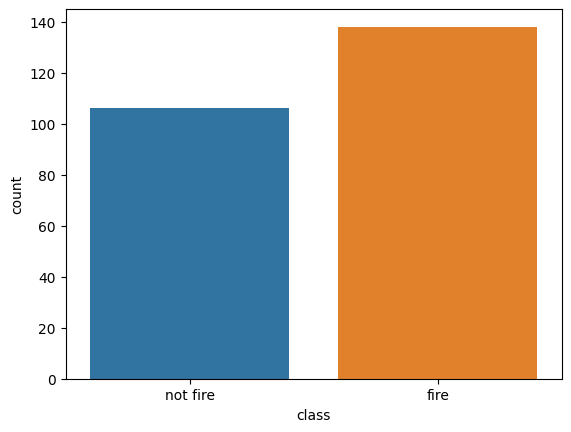

In [15]:
sns.countplot('class',data=data)

In [16]:
data['class'].value_counts(normalize=True)

fire        0.565574
not fire    0.434426
Name: class, dtype: float64

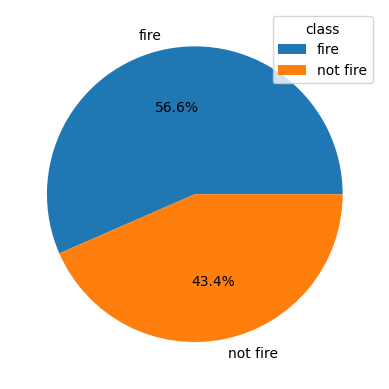

In [17]:
plt.pie(data['class'].value_counts(normalize=True),
       labels=data['class'].value_counts(normalize=True).index,
       autopct='%.1f%%')
plt.legend(title='class')

Obervation: Clearly, we can see the data is almost balanced

# Numeric Features

In [18]:
features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'WS',
 'rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

# Temperature

<AxesSubplot:xlabel='Temperature'>

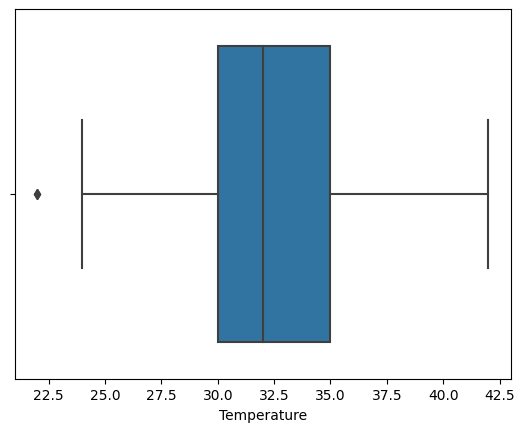

In [19]:
sns.boxplot('Temperature',data=data)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

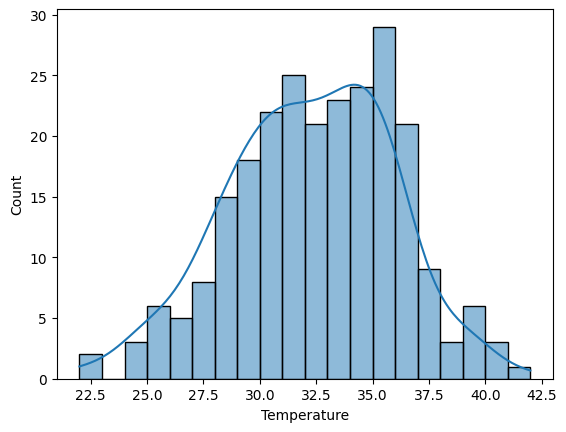

In [20]:
sns.histplot(x='Temperature',data=data,bins=20,kde=True)

In [21]:
data['Temperature'].describe()

count    244.000000
mean      32.172131
std        3.633843
min       22.000000
25%       30.000000
50%       32.000000
75%       35.000000
max       42.000000
Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Temperature', ylabel='class'>

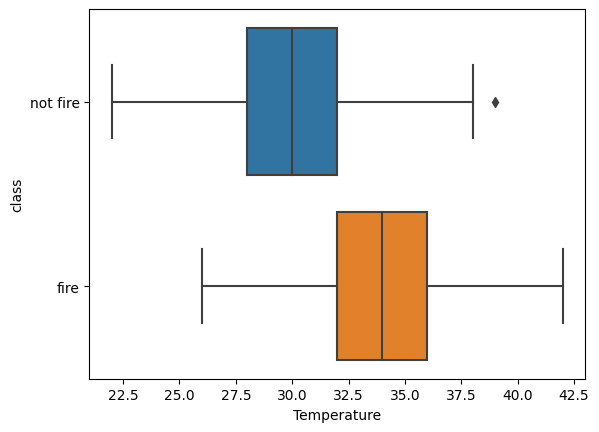

In [22]:
sns.boxplot(x='Temperature',y='class',data=data)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

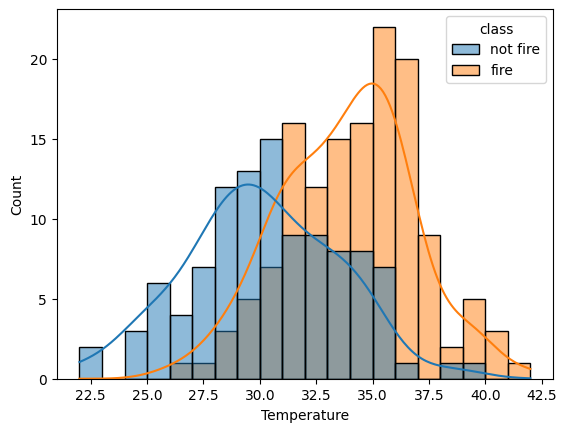

In [23]:
sns.histplot(x='Temperature',data=data,hue='class',kde=True,bins=20)

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

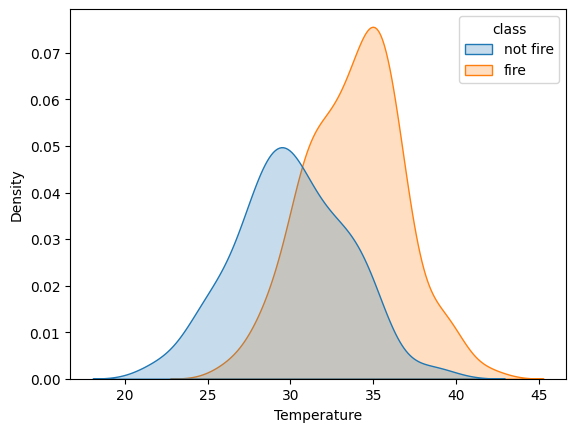

In [24]:
sns.kdeplot(data=data, x="Temperature", hue="class", fill=True)

Observation: Temperature data is normally distributed. If temperature is greater than 30 there is good chance of fire

# Wind Speed

<AxesSubplot:xlabel='WS'>

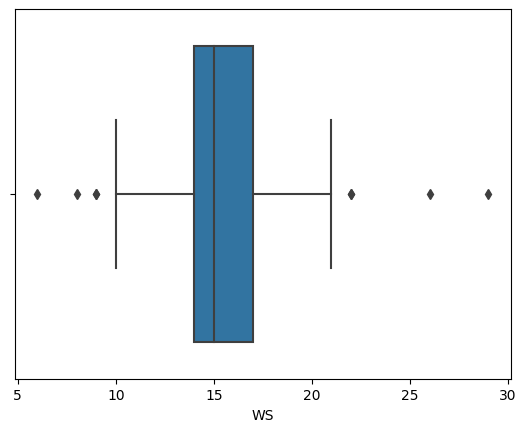

In [25]:
sns.boxplot(x='WS',data=data)

<AxesSubplot:xlabel='WS', ylabel='Count'>

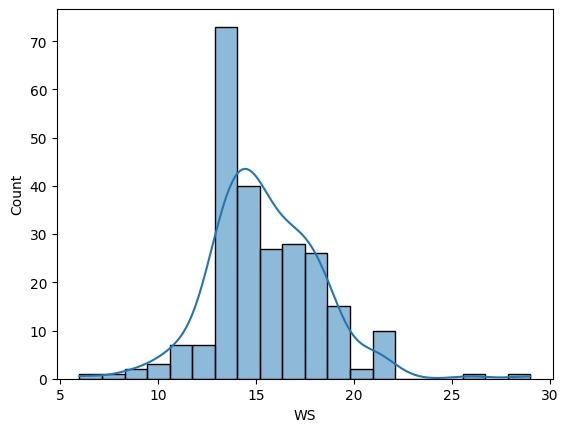

In [26]:
sns.histplot(x='WS',data=data,kde=True,bins=20)

In [27]:
data['WS'].describe()

count    244.000000
mean      15.504098
std        2.810178
min        6.000000
25%       14.000000
50%       15.000000
75%       17.000000
max       29.000000
Name: WS, dtype: float64

<AxesSubplot:xlabel='WS', ylabel='class'>

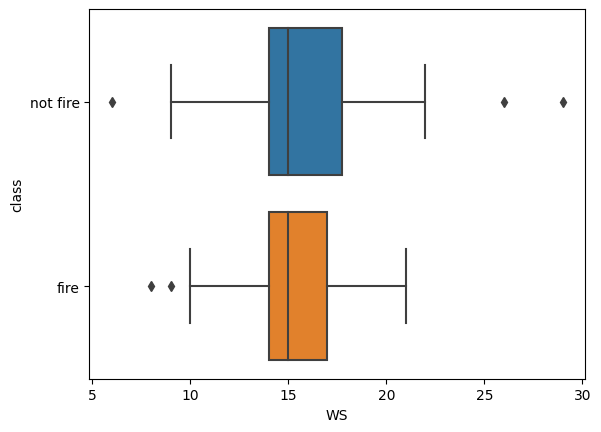

In [28]:
sns.boxplot(x='WS',y='class',data=data)

<AxesSubplot:xlabel='WS', ylabel='Count'>

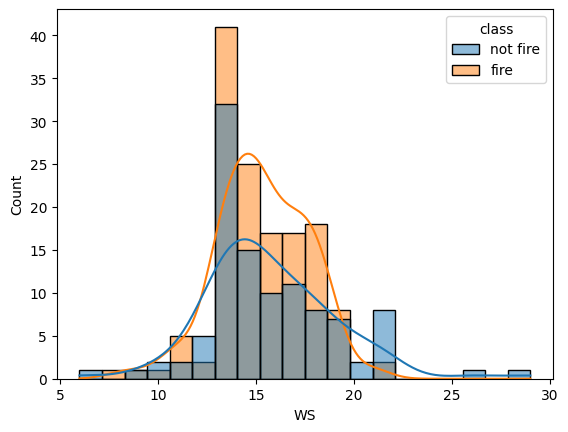

In [29]:
sns.histplot(x='WS',data=data,hue='class',kde=True,bins=20)

<AxesSubplot:xlabel='WS', ylabel='Density'>

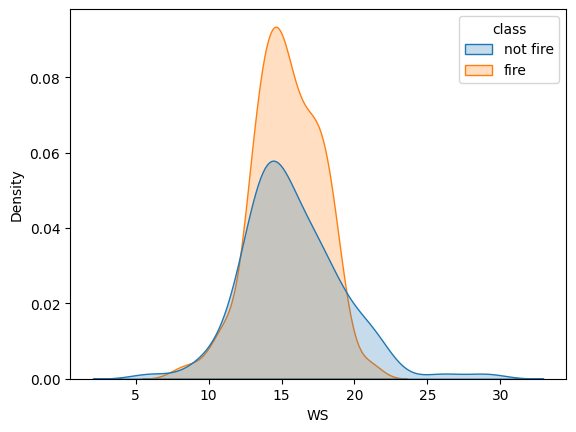

In [30]:
sns.kdeplot(data=data, x="WS", hue="class", fill=True)

Observation: Wind speed data is normally distributed.

# RH : Relative Humidity

<AxesSubplot:xlabel='RH'>

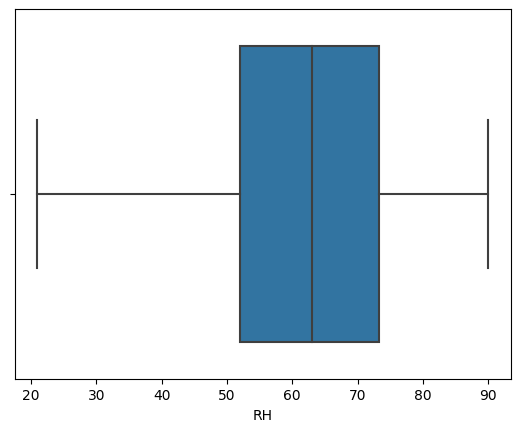

In [31]:
sns.boxplot(x='RH',data=data)

<AxesSubplot:xlabel='RH', ylabel='Count'>

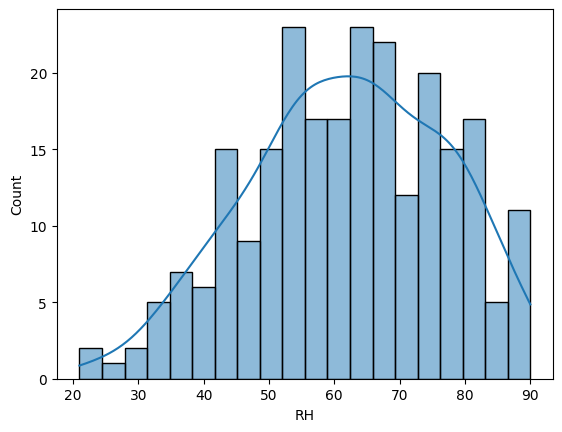

In [32]:
sns.histplot(x='RH',data=data,kde=True,bins=20)

In [33]:
data['RH'].describe()

count    244.000000
mean      61.938525
std       14.884200
min       21.000000
25%       52.000000
50%       63.000000
75%       73.250000
max       90.000000
Name: RH, dtype: float64

<AxesSubplot:xlabel='RH', ylabel='class'>

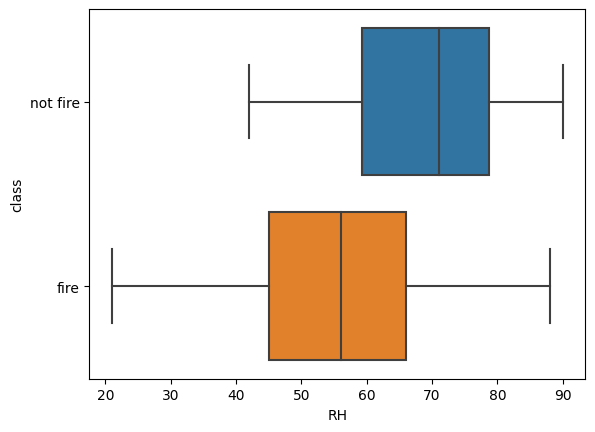

In [34]:
sns.boxplot(x='RH',y='class',data=data)

<AxesSubplot:xlabel='RH', ylabel='Count'>

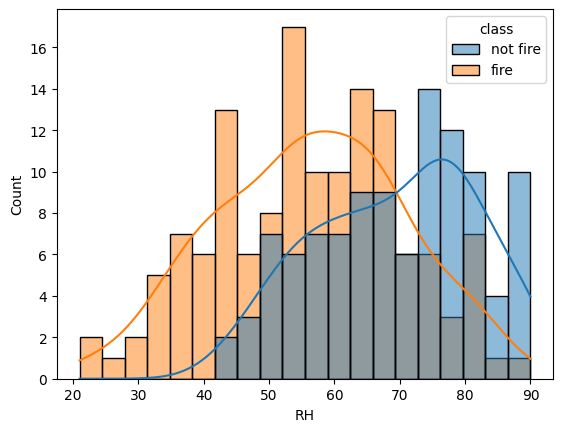

In [35]:
sns.histplot(x='RH',data=data,hue='class',kde=True,bins=20)

<AxesSubplot:xlabel='RH', ylabel='Density'>

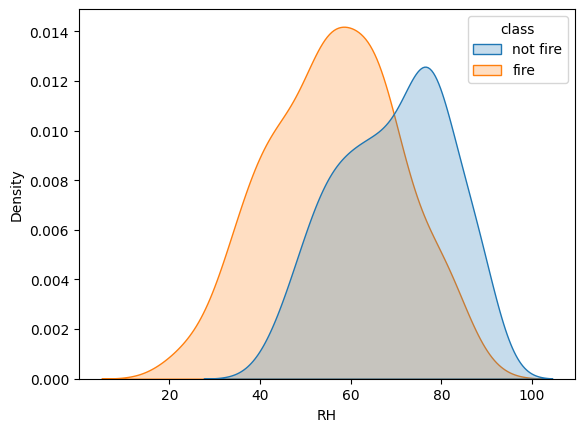

In [36]:
sns.kdeplot(data=data, x="RH", hue="class", fill=True)

Observation: Relative humidity data is little right skewed. There is less chance fire if RH is high.

# rain

<AxesSubplot:xlabel='rain'>

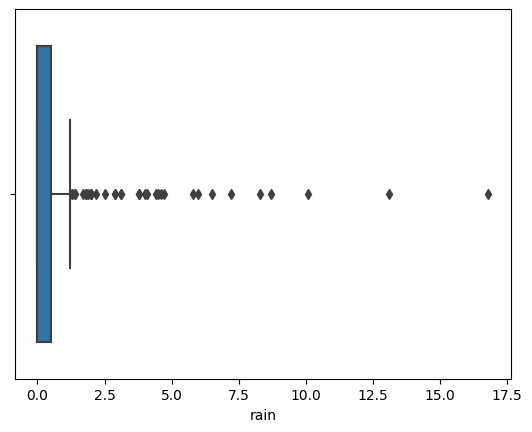

In [37]:
sns.boxplot(x='rain',data=data)

<AxesSubplot:xlabel='rain', ylabel='Count'>

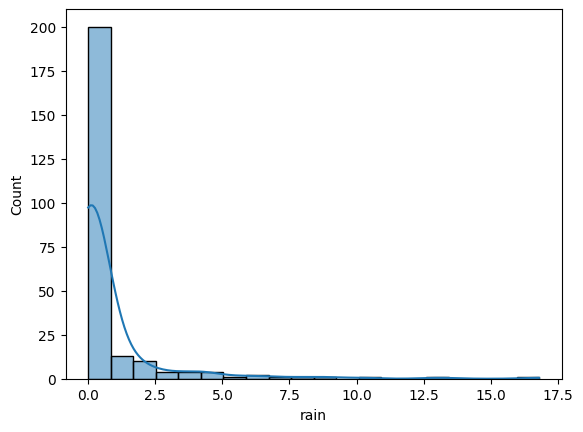

In [38]:
sns.histplot(data=data,x='rain',kde=True,bins=20)

In [39]:
data['rain'].describe()

count    244.000000
mean       0.760656
std        1.999406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max       16.800000
Name: rain, dtype: float64

In [40]:
data['rain'].value_counts()

0.0     133
0.1      18
0.2      12
0.3      10
0.4       8
0.7       6
0.6       6
0.5       5
1.1       3
1.2       3
2.0       3
1.8       3
0.8       2
2.9       2
1.3       2
3.8       2
1.4       2
1.0       2
3.1       2
16.8      1
4.5       1
6.5       1
4.1       1
13.1      1
1.9       1
6.0       1
2.2       1
1.7       1
2.5       1
4.7       1
8.7       1
7.2       1
4.0       1
5.8       1
8.3       1
4.6       1
0.9       1
10.1      1
4.4       1
Name: rain, dtype: int64

<AxesSubplot:xlabel='rain', ylabel='class'>

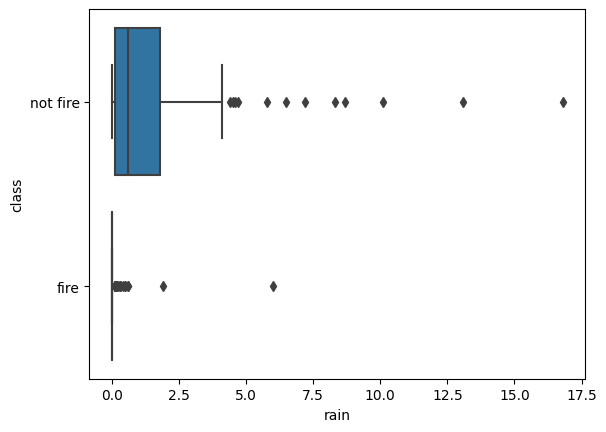

In [41]:
sns.boxplot(x='rain',y='class',data=data)

<AxesSubplot:xlabel='rain', ylabel='Count'>

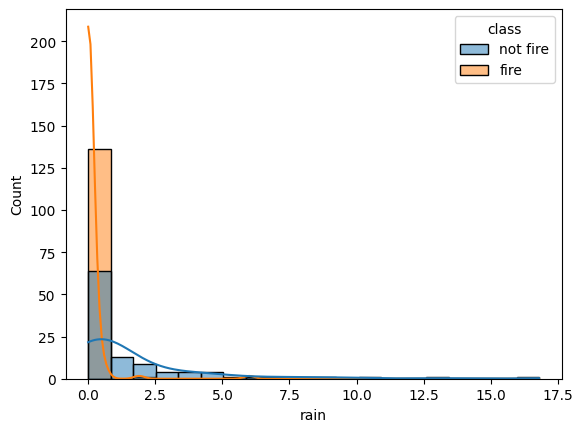

In [42]:
sns.histplot(x='rain',data=data,hue='class',kde=True,bins=20)

<AxesSubplot:xlabel='rain', ylabel='Density'>

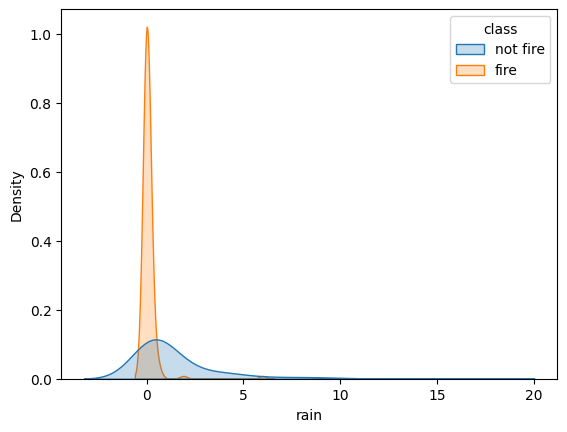

In [43]:
sns.kdeplot(x='rain',data=data,hue='class',fill=True)

Observations: More data is concentracted at 0 mm rainfall which likely to cause fire

# FFMC:Fine Fuel Moisture Code index

<AxesSubplot:xlabel='FFMC'>

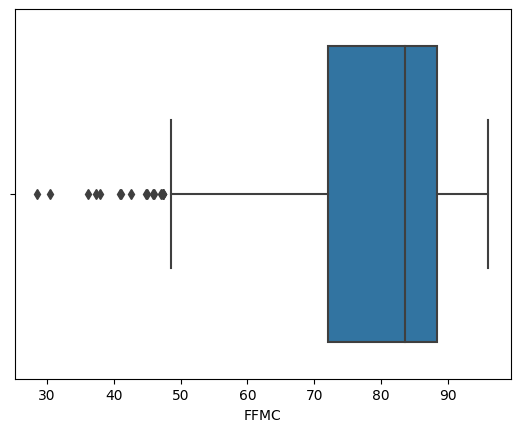

In [44]:
sns.boxplot(x='FFMC',data=data)

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

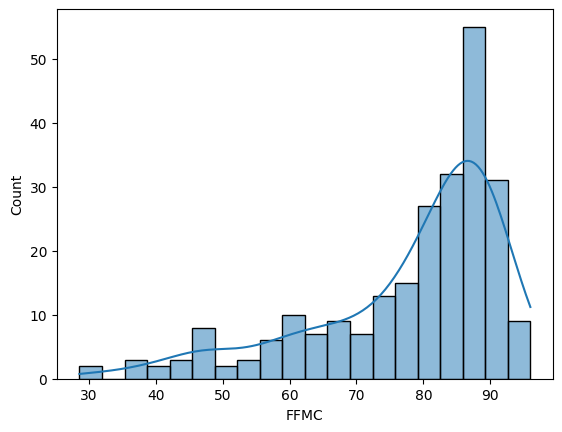

In [45]:
sns.histplot(x='FFMC',data=data,bins=20,kde=True)

In [46]:
data['FFMC'].describe()

count    244.000000
mean      77.887705
std       14.337571
min       28.600000
25%       72.075000
50%       83.500000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64

<AxesSubplot:xlabel='FFMC', ylabel='class'>

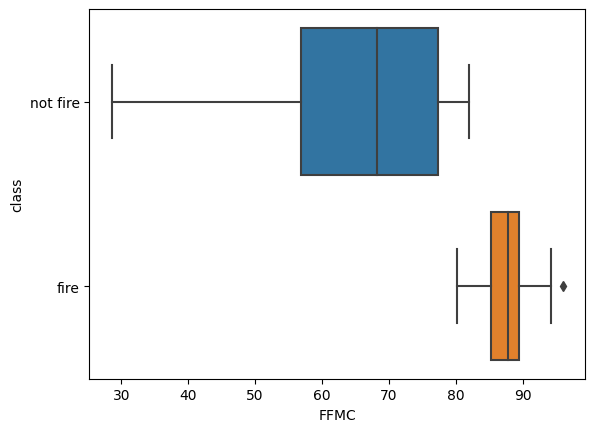

In [47]:
sns.boxplot(x='FFMC',data=data,y='class')

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

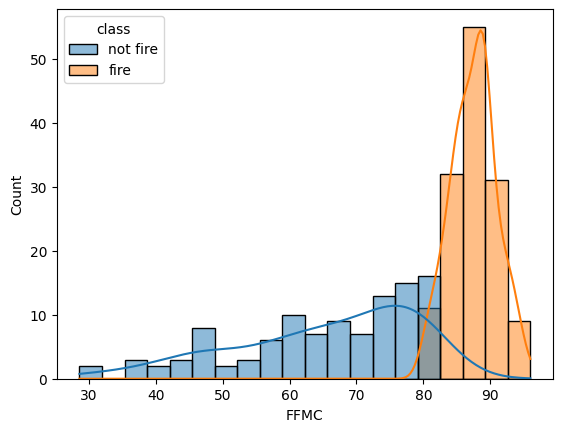

In [48]:
sns.histplot(x='FFMC',data=data,bins=20,kde=True,hue='class')

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

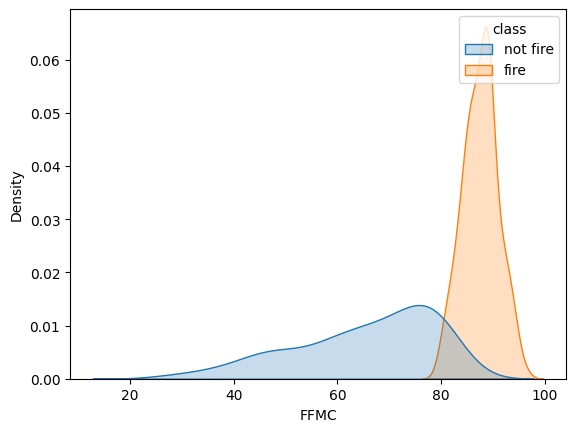

In [49]:
sns.kdeplot(x='FFMC',data=data,fill=True,hue='class')

Obsrvation: FFMC data is left skewed. high value FFMC tends cause forest fire.

# DMC: Duff Moisture Code index

<AxesSubplot:xlabel='DMC'>

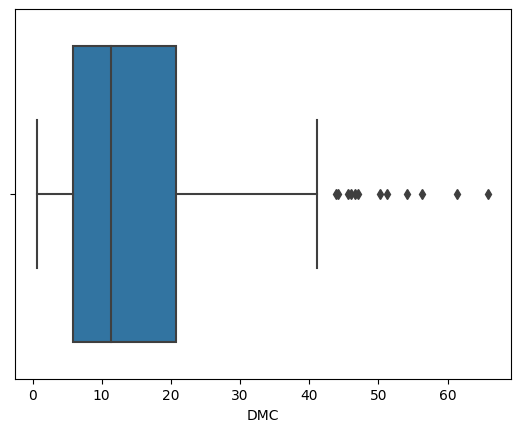

In [50]:
sns.boxplot(x='DMC',data=data)

<AxesSubplot:xlabel='DMC', ylabel='Count'>

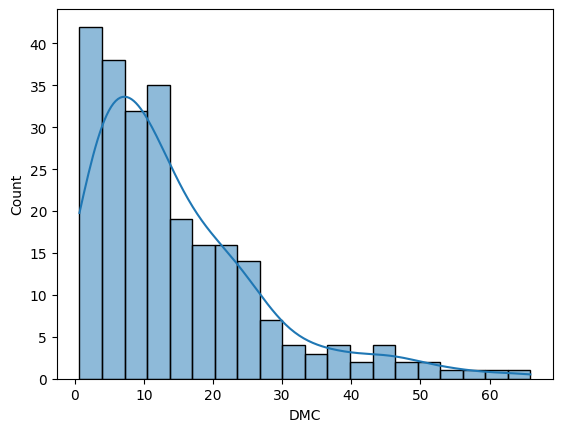

In [51]:
sns.histplot(x='DMC',data=data,kde=True,bins=20)

In [52]:
data['DMC'].describe()

count    244.000000
mean      14.673361
std       12.368039
min        0.700000
25%        5.800000
50%       11.300000
75%       20.750000
max       65.900000
Name: DMC, dtype: float64

<AxesSubplot:xlabel='DMC', ylabel='class'>

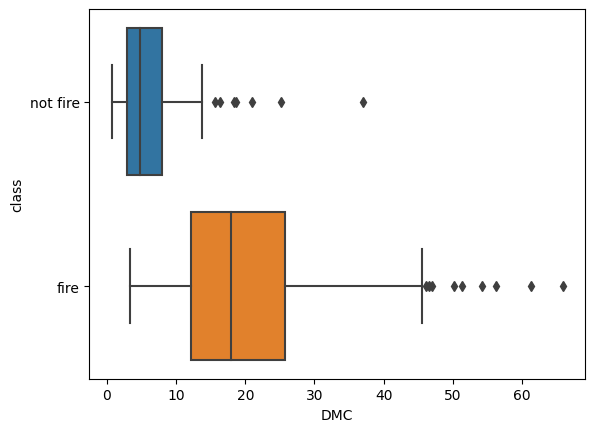

In [53]:
sns.boxplot(x='DMC',y='class',data=data)

<AxesSubplot:xlabel='DMC', ylabel='Count'>

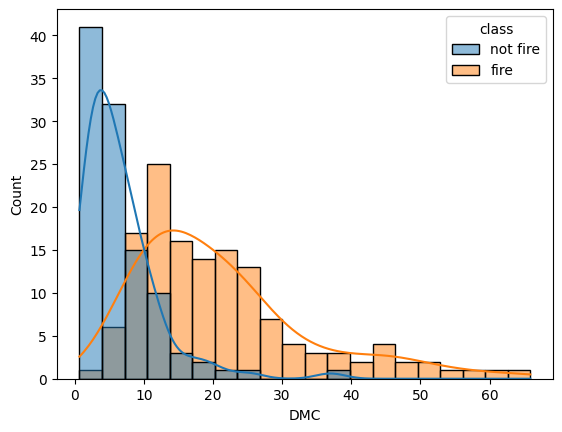

In [54]:
sns.histplot(x='DMC',hue='class',bins=20,kde=True,data=data)

<AxesSubplot:xlabel='DMC', ylabel='Density'>

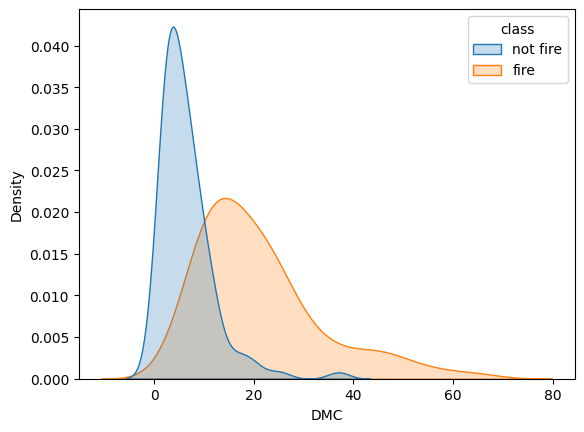

In [55]:
sns.kdeplot(x='DMC',data=data,hue='class',fill=True)

Obervation: DMC data is right skewed. higher value of DMC tends to cause fire.

# DC: Drought Code (DC) index

<AxesSubplot:xlabel='DC'>

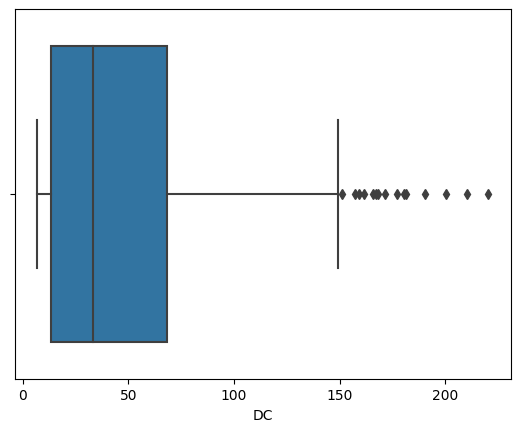

In [56]:
sns.boxplot(x='DC',data=data)

<AxesSubplot:xlabel='DC', ylabel='Count'>

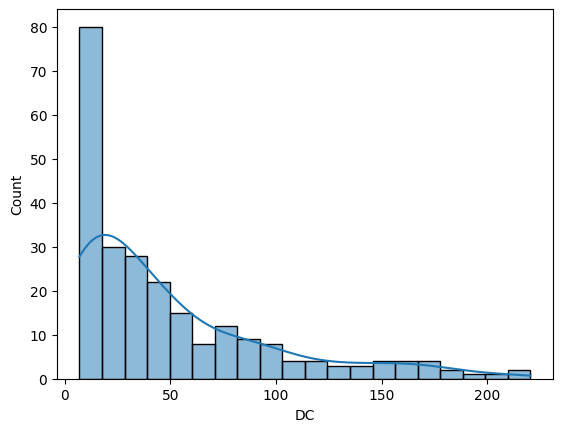

In [57]:
sns.histplot(x='DC',data=data,bins=20,kde=True)

In [58]:
data['DC'].describe()

count    244.000000
mean      49.288115
std       47.619662
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64

<AxesSubplot:xlabel='DC', ylabel='class'>

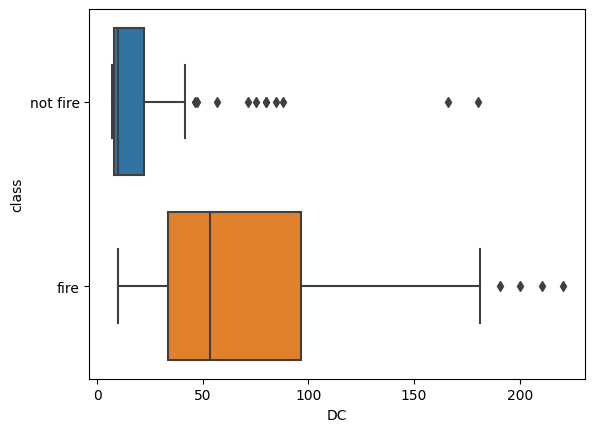

In [59]:
sns.boxplot(x='DC',y='class',data=data)

<AxesSubplot:xlabel='DC', ylabel='Count'>

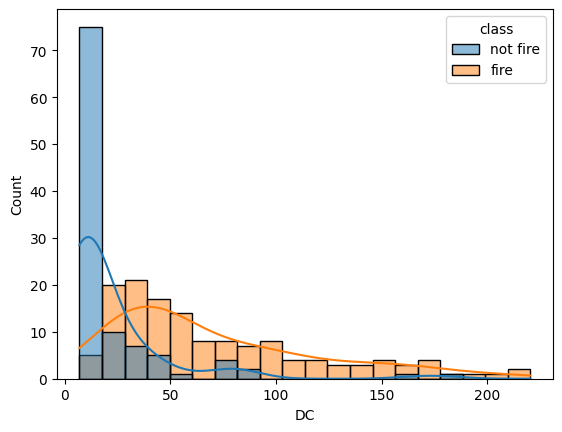

In [60]:
sns.histplot(x='DC',data=data,kde=True,bins=20,hue='class')

<AxesSubplot:xlabel='DC', ylabel='Density'>

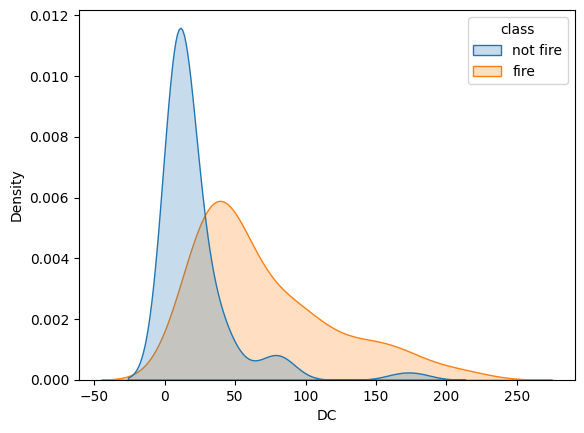

In [61]:
sns.kdeplot(x='DC',data=data,fill=True,hue='class')

Observation: DC data is right skewed. Higher value of DC tends to cause fire.

# ISI: initial Spread Index (ISI) index

<AxesSubplot:xlabel='ISI'>

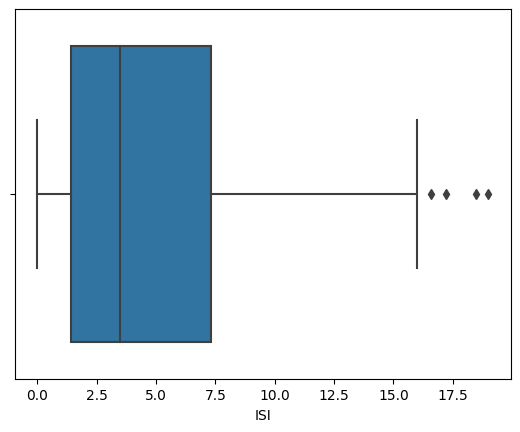

In [62]:
sns.boxplot(x='ISI',data=data)

<AxesSubplot:xlabel='ISI', ylabel='Count'>

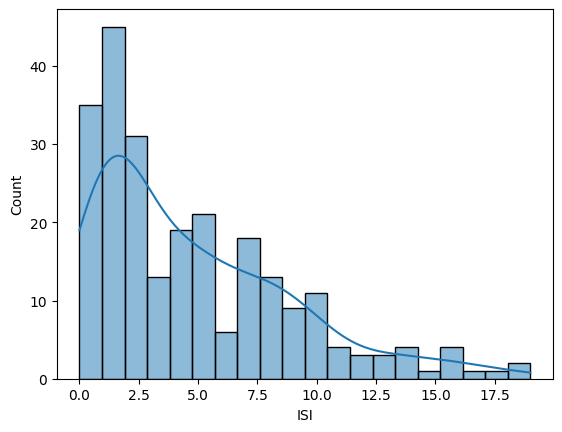

In [63]:
sns.histplot(x='ISI',data=data,bins=20,kde=True)

In [64]:
data['ISI'].describe()

count    244.000000
mean       4.759836
std        4.154628
min        0.000000
25%        1.400000
50%        3.500000
75%        7.300000
max       19.000000
Name: ISI, dtype: float64

<AxesSubplot:xlabel='ISI', ylabel='class'>

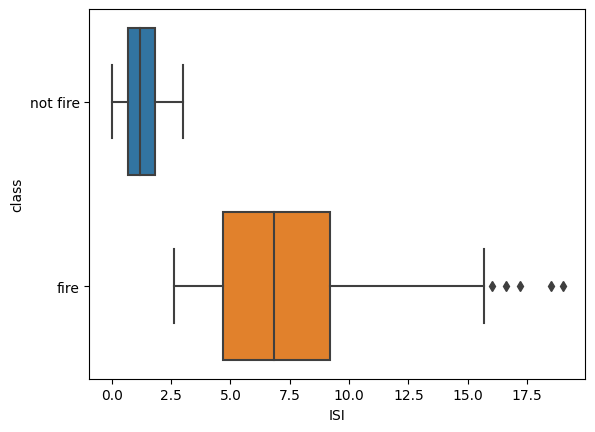

In [65]:
sns.boxplot(x='ISI',data=data,y='class')

<AxesSubplot:xlabel='ISI', ylabel='Count'>

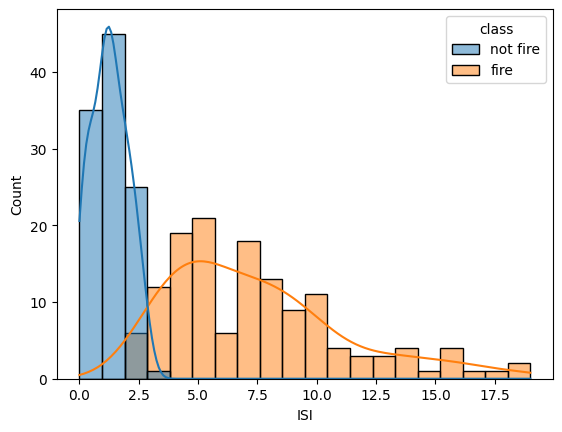

In [66]:
sns.histplot(x='ISI',data=data,hue='class',bins=20,kde=True)

<AxesSubplot:xlabel='ISI', ylabel='Density'>

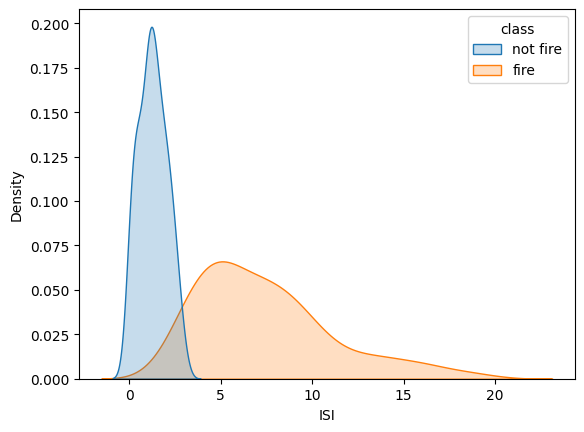

In [67]:
sns.kdeplot(x='ISI',data=data,hue='class',fill=True)

observation: ISI data is right skewed. Higher value of ISI tends to cause fire.

# BUI: Buildup Index

<AxesSubplot:xlabel='BUI'>

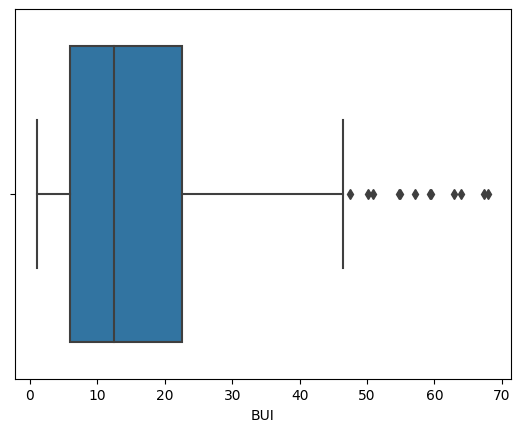

In [68]:
sns.boxplot(x='BUI',data=data)

<AxesSubplot:xlabel='BUI', ylabel='Count'>

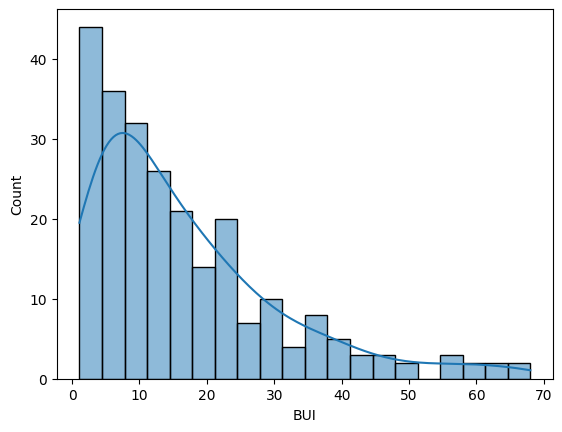

In [69]:
sns.histplot(x='BUI',data=data,bins=20,kde=True)

In [70]:
data['BUI'].describe()

count    244.000000
mean      16.673361
std       14.201648
min        1.100000
25%        6.000000
50%       12.450000
75%       22.525000
max       68.000000
Name: BUI, dtype: float64

<AxesSubplot:xlabel='BUI', ylabel='class'>

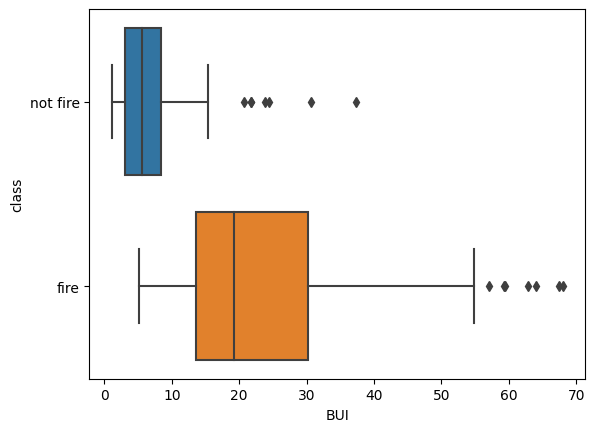

In [71]:
sns.boxplot(x='BUI',data=data,y='class')

<AxesSubplot:xlabel='BUI', ylabel='Count'>

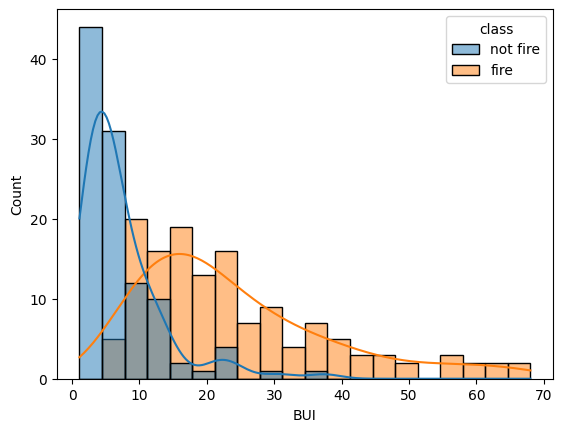

In [72]:
sns.histplot(x='BUI',bins=20,hue='class',kde=True,data=data)

<AxesSubplot:xlabel='BUI', ylabel='Density'>

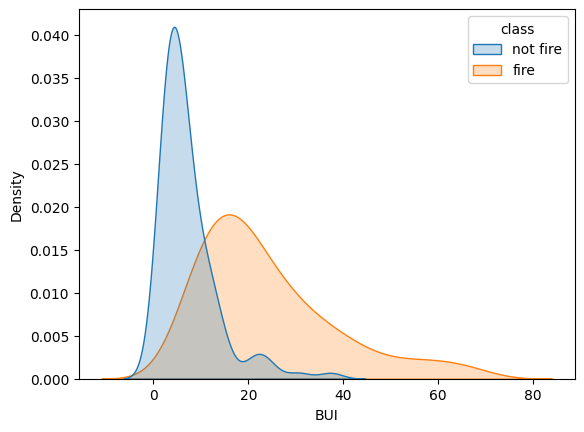

In [73]:
sns.kdeplot(x='BUI',data=data,hue='class',fill=True)

Observation: BUI data is right skewed. Higher value of BUI tends to cause fire.

# FWI:Fire Weather Index

<AxesSubplot:xlabel='FWI'>

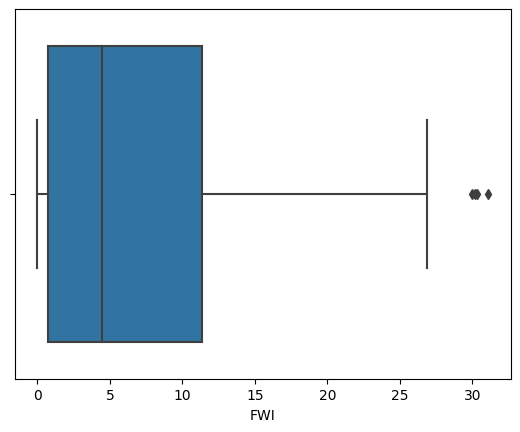

In [74]:
sns.boxplot(x='FWI',data=data)

<AxesSubplot:xlabel='FWI', ylabel='Count'>

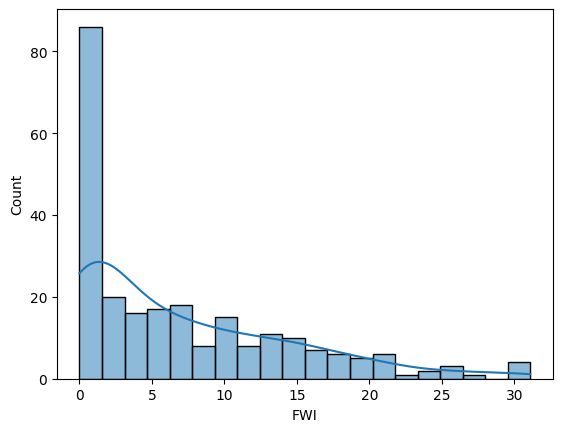

In [75]:
sns.histplot(x='FWI',data=data,bins=20,kde=True)

In [76]:
data['FWI'].describe()

count    244.000000
mean       7.049180
std        7.428366
min        0.000000
25%        0.700000
50%        4.450000
75%       11.375000
max       31.100000
Name: FWI, dtype: float64

<AxesSubplot:xlabel='FWI', ylabel='class'>

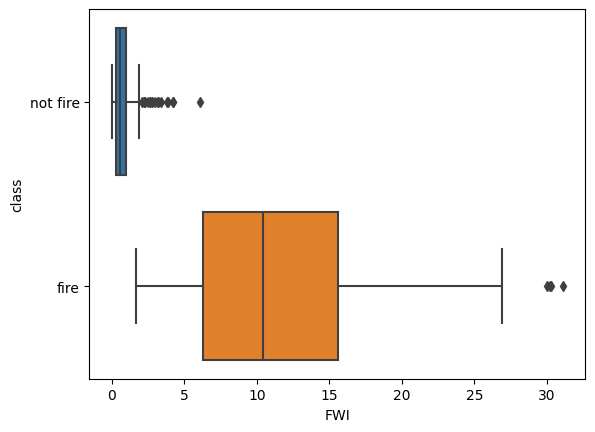

In [77]:
sns.boxplot(x='FWI',y='class',data=data)

<AxesSubplot:xlabel='FWI', ylabel='Count'>

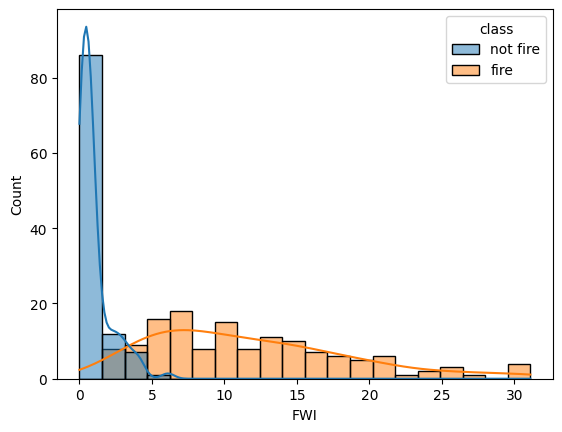

In [78]:
sns.histplot(x='FWI',data=data,bins=20,kde=True,hue='class')

<AxesSubplot:xlabel='FWI', ylabel='Density'>

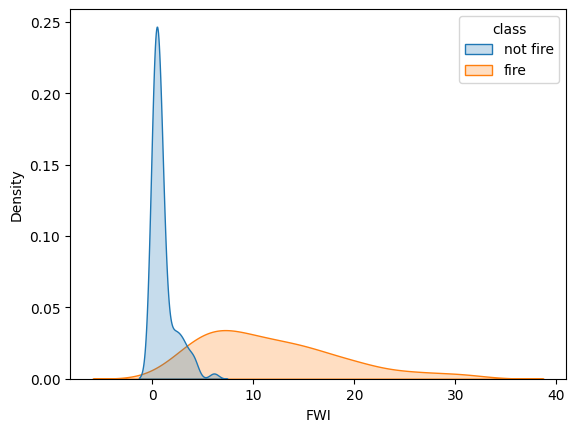

In [79]:
sns.kdeplot(x='FWI',data=data,hue='class',fill=True)

Observation: FWI data is right skewed. Higher value of FWI tends to cause fire.

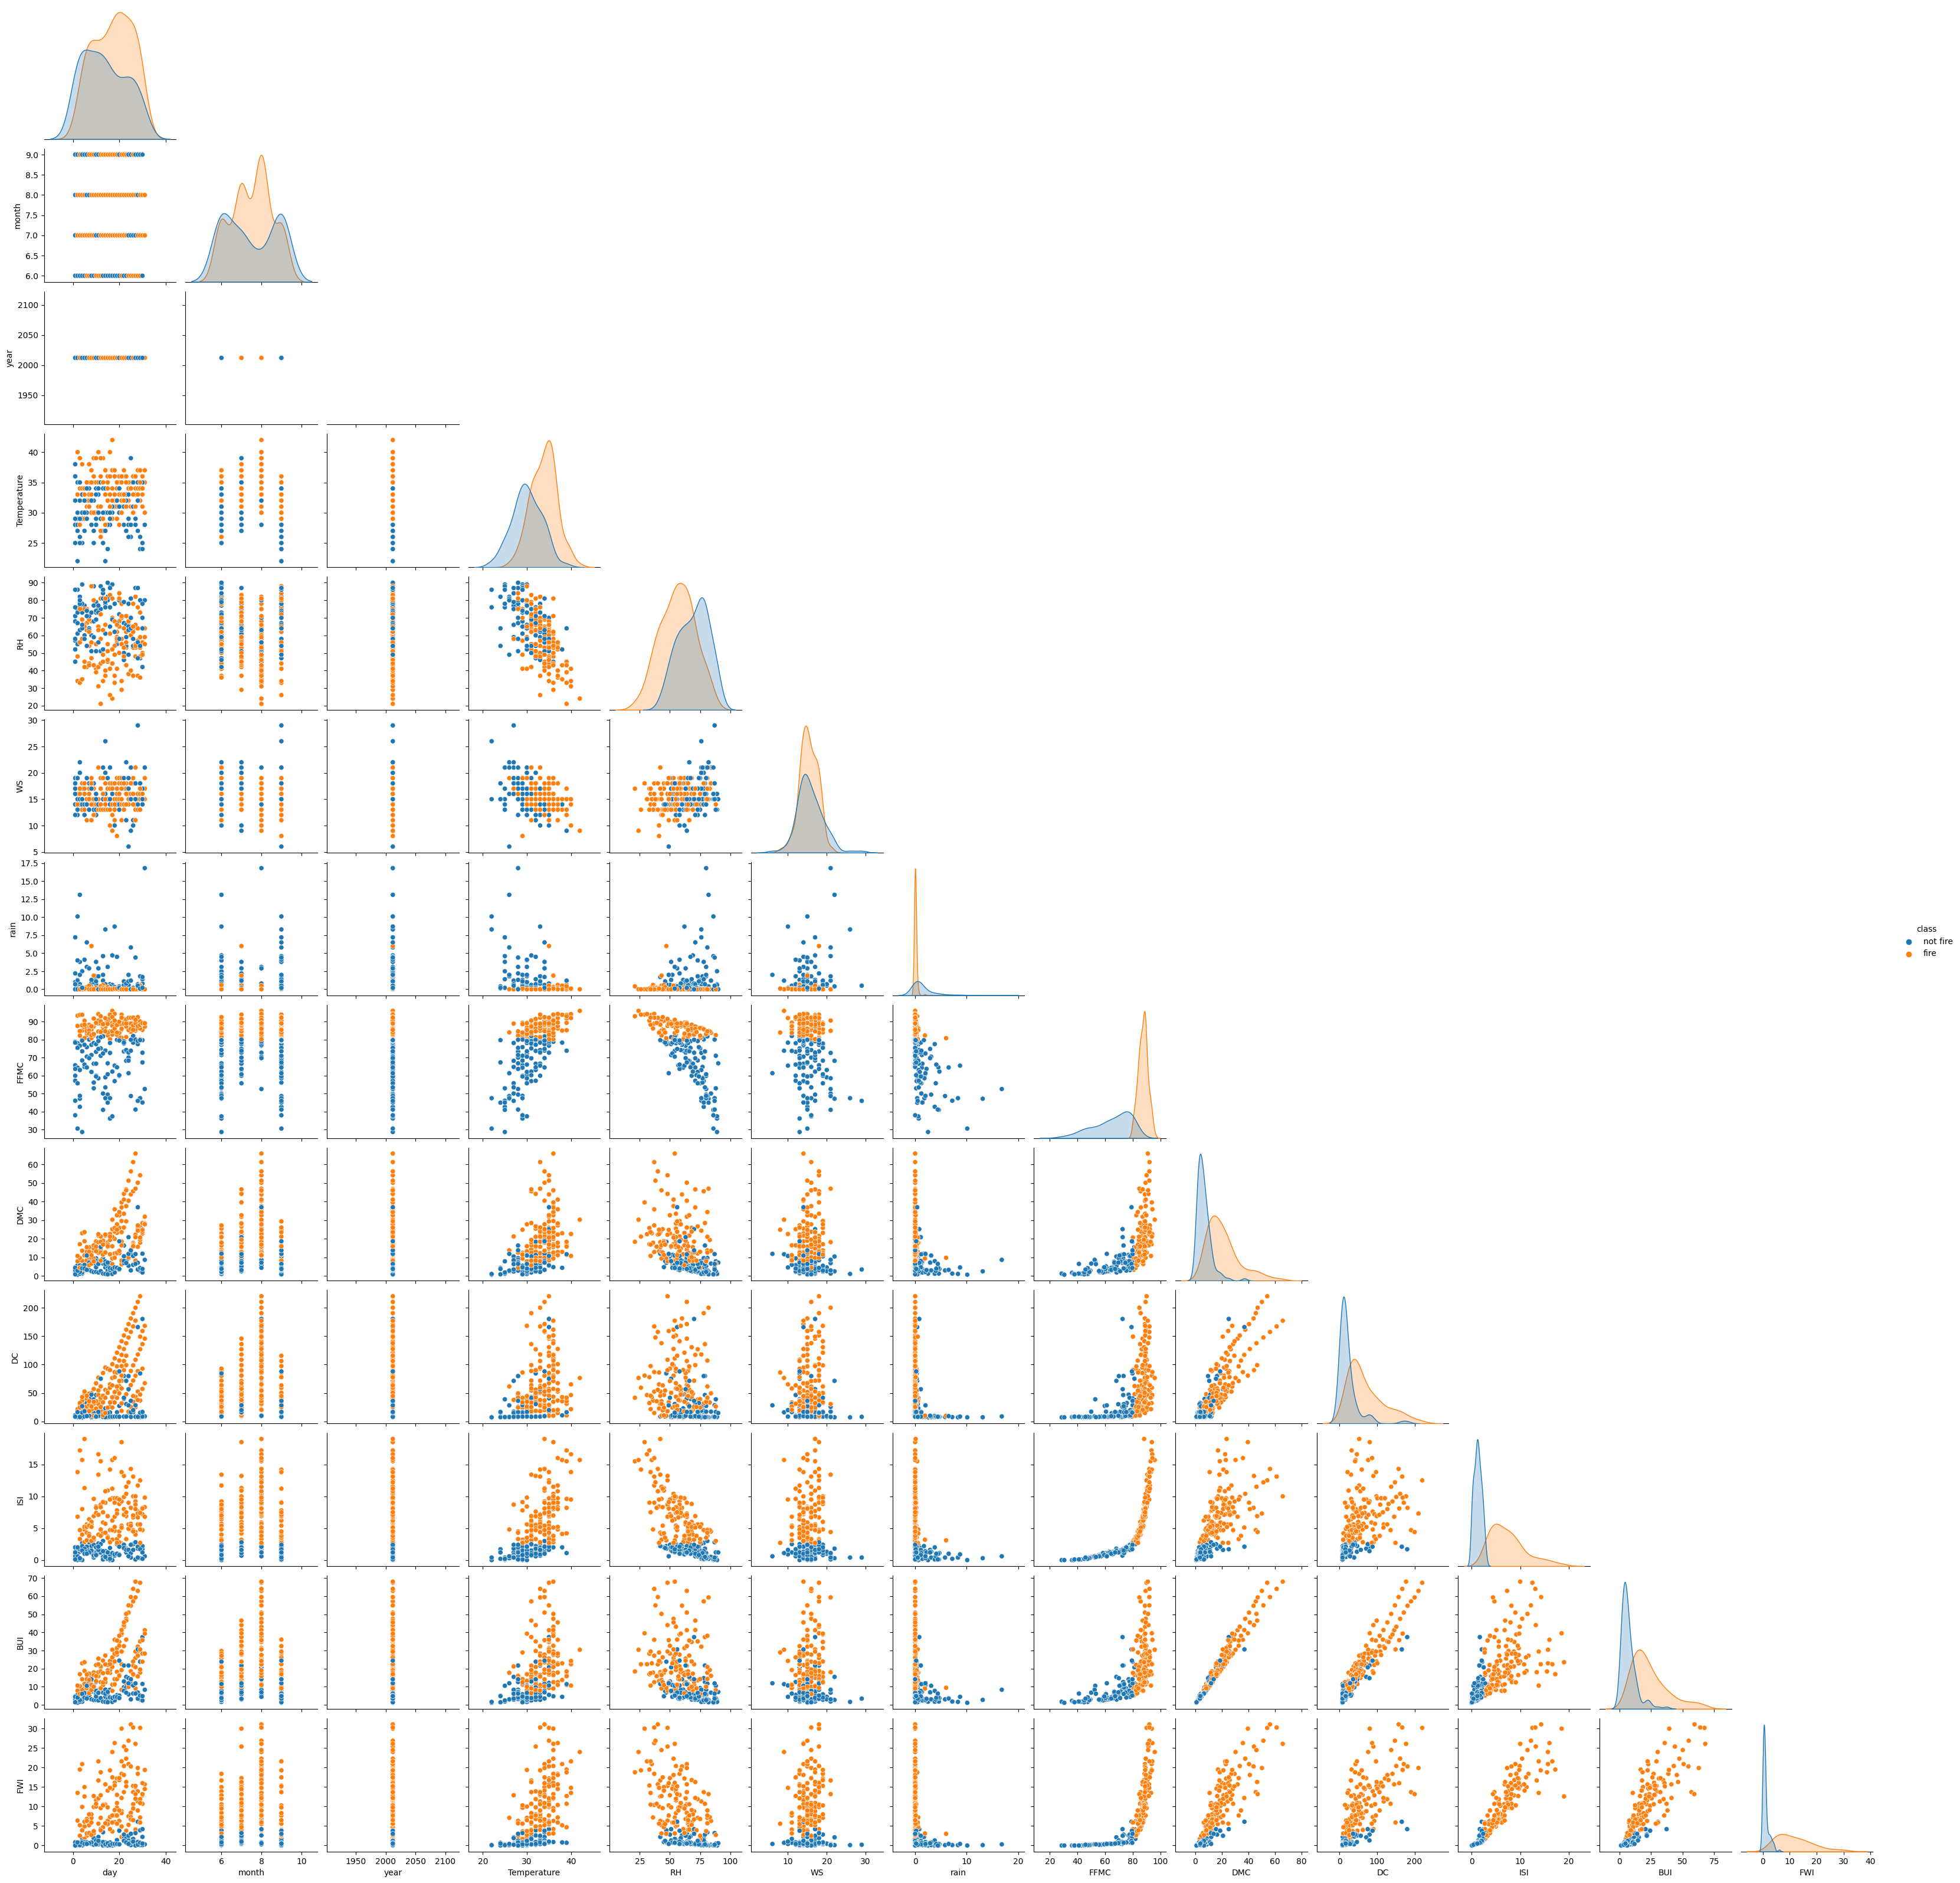

In [80]:
sns.pairplot(data, hue="class", corner=True)

Observation: I can see some relation between all indexes

In [81]:
cor = data.corr()

<AxesSubplot:>

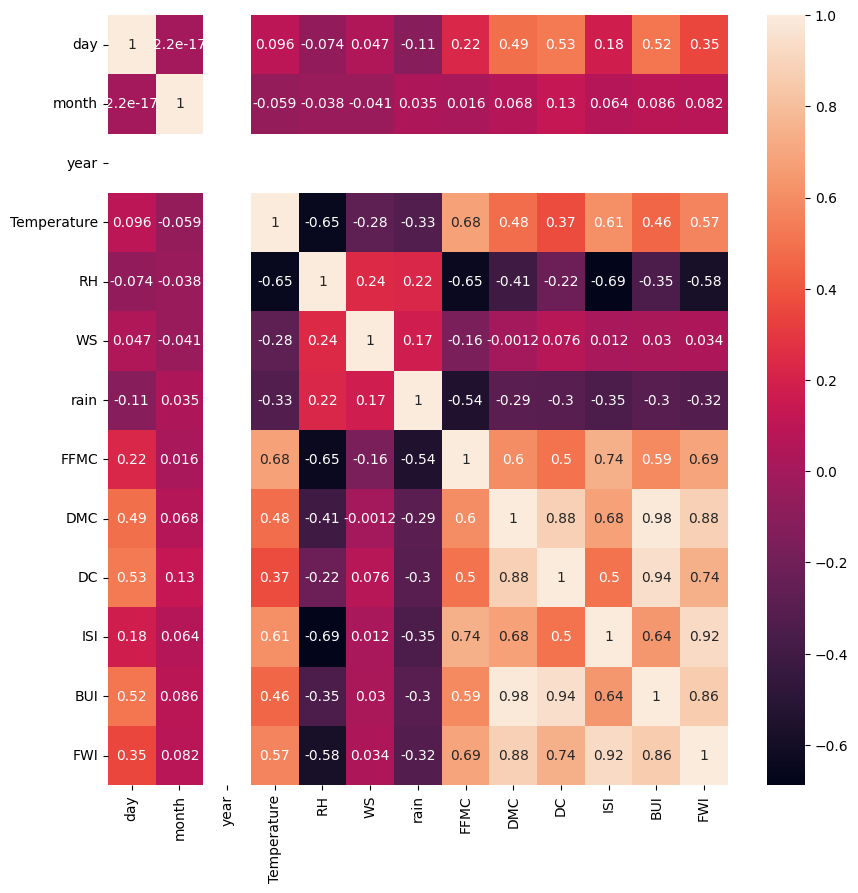

In [82]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cor,annot=True,ax=ax)

Obsrvation: INDEXES are highly correlated.

In [83]:
data.head()

,day,month,year,Temperature,RH,WS,rain,FFMC,DMC,DC,ISI,BUI,FWI,class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [84]:
data.drop(['day','year'],axis=1,inplace=True)

In [85]:
data['month']=data['month'].astype('object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        244 non-null    object 
 1   Temperature  244 non-null    int64  
 2   RH           244 non-null    int64  
 3   WS           244 non-null    int64  
 4   rain         244 non-null    float64
 5   FFMC         244 non-null    float64
 6   DMC          244 non-null    float64
 7   DC           244 non-null    float64
 8   ISI          244 non-null    float64
 9   BUI          244 non-null    float64
 10  FWI          244 non-null    float64
 11  class        244 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 23.0+ KB


# Categorical Features

# month

In [87]:
data.groupby(by="month")['class'].value_counts(dropna=False)

month  class   
6      not fire    35
       fire        25
7      fire        39
       not fire    23
8      fire        51
       not fire    11
9      not fire    37
       fire        23
Name: class, dtype: int64

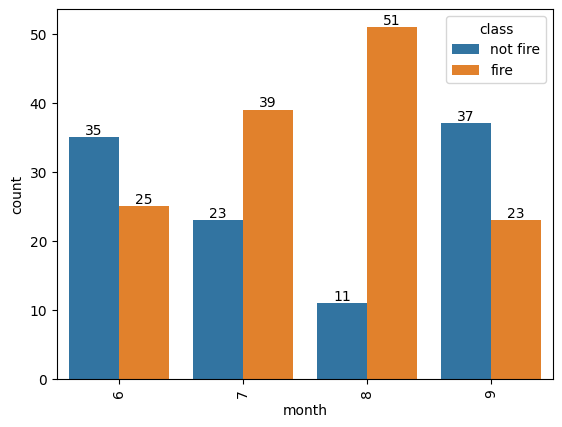

In [88]:
g=sns.countplot(data=data, x="month", hue="class")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [89]:
month = data.groupby("month")["class"].value_counts(normalize=True)
month

month  class   
6      not fire    0.583333
       fire        0.416667
7      fire        0.629032
       not fire    0.370968
8      fire        0.822581
       not fire    0.177419
9      not fire    0.616667
       fire        0.383333
Name: class, dtype: float64

In [90]:
month_df = pd.DataFrame(month)
month_df.rename(columns = {"class" : "percentage"}, inplace = True)
month_df.reset_index(inplace = True)
month_df.sort_values(by = ["class", "month"], inplace=True)
month_df

,month,class,percentage
1,6,fire,0.416667
2,7,fire,0.629032
4,8,fire,0.822581
7,9,fire,0.383333
0,6,not fire,0.583333
3,7,not fire,0.370968
5,8,not fire,0.177419
6,9,not fire,0.616667


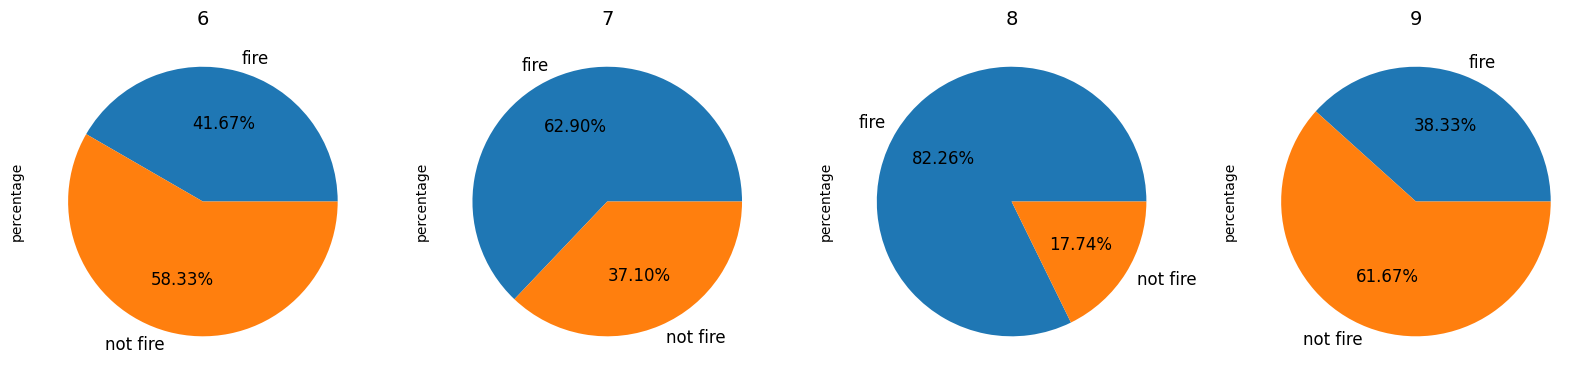

In [91]:
plt.figure(figsize = (20, 10))
index = 1
for c in list(month_df['month'].unique()):
    plt.subplot(1,len(list(month_df['month'].unique())),index)
    month_df.groupby("month")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(month_df['class'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title(c, fontdict = {'fontsize': 14})
    index += 1

In [92]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Temperature,RH,WS,rain,FFMC,DMC,DC,ISI,BUI,FWI,month_7,month_8,month_9,class_not fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,0,1


In [93]:
X = data.drop('class_not fire',axis=1)
y = data['class_not fire']

Observation: Higher chance of fire in month of july and august.

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/viketanrev91ine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/viketanrev91ine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best: 0.963235 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955025 (0.054973) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.952941 (0.056753) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949020 (0.052978) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.957108 (0.050537) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955025 (0.052551) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.951103 (0.051226) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.959069 (0.048707) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954902 (0.047690) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.954902 (0.047690) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.963235 (0.049352) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954902 (0.047690) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957108 (0.047891) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.950735 (0.060861) wit

In [96]:
model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
model.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [97]:
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
target_names = ['fire','not fire']

0.9753086419753086


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        fire       1.00      0.96      0.98        53
    not fire       0.93      1.00      0.97        28

    accuracy                           0.98        81
   macro avg       0.97      0.98      0.97        81
weighted avg       0.98      0.98      0.98        81



In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
# Implementing Oversampling for Handling Imbalanced 
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)

In [104]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 138, 1: 106})
Resampled dataset shape Counter({1: 138, 0: 138})


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [106]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/viketanrev91ine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/viketanrev91ine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best: 0.985478 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.980214 (0.029353) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.981871 (0.029389) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.980019 (0.029934) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.981871 (0.025651) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983626 (0.028843) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983626 (0.028843) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.983723 (0.024876) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983723 (0.024876) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.985478 (0.024094) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.980019 (0.032874) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972904 (0.036489) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965692 (0.035467) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.967446 (0.038308) wit

/home/viketanrev91ine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/viketanrev91ine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [107]:
model_res = LogisticRegression(C=1.0, penalty='l2',solver='liblinear')
model_res.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [108]:
print(model_res.score(X_test,y_test))
y_pred = model_res.predict(X_test)
target_names = ['fire','not fire']

0.9456521739130435


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        fire       0.96      0.94      0.95        47
    not fire       0.93      0.96      0.95        45

    accuracy                           0.95        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92

